In [43]:
import torch
import matplotlib.pyplot as plt

In [44]:
checkpoint_1 = torch.load("../checkpoints/initial_model_beta0=0.pt")
checkpoint_2 = torch.load("../checkpoints/initial_model_beta0=1.pt")

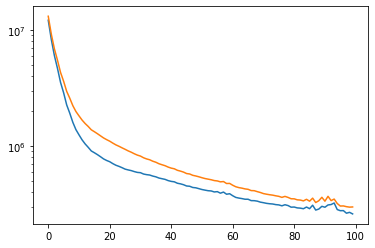

In [45]:
plt.plot(checkpoint_1["loss_history"])
plt.plot(checkpoint_2["loss_history"])
plt.yscale("log")

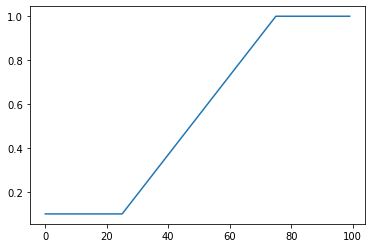

In [54]:
class BetaFunction:
    def __init__(self, beta_0, n_epochs, start=0.25, end=0.75) -> None:

        self.beta_0 = beta_0
        self.n_epochs = n_epochs
        self.start = start * n_epochs
        self.end = end * n_epochs

        self.a = 2 * (1 - beta_0) / self.n_epochs
        self.b = beta_0 - self.a * self.n_epochs / 4

        self.elbo_valid_after = self.end

    def __call__(self, i):

        if i < self.start:
            return self.beta_0
        elif i >= self.start and i < self.end:
            return self.a * i + self.b
        else:
            return 1

beta_function = BetaFunction(0.1, 100)

plt.plot([beta_function(x) for x in torch.arange(0, 100)])